<a href="https://colab.research.google.com/github/ltocasuche/Metodos1_Fernando_Bareno_Y_Laura_Tocasuche/blob/main/minimos_cuadrados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PUNTO 1

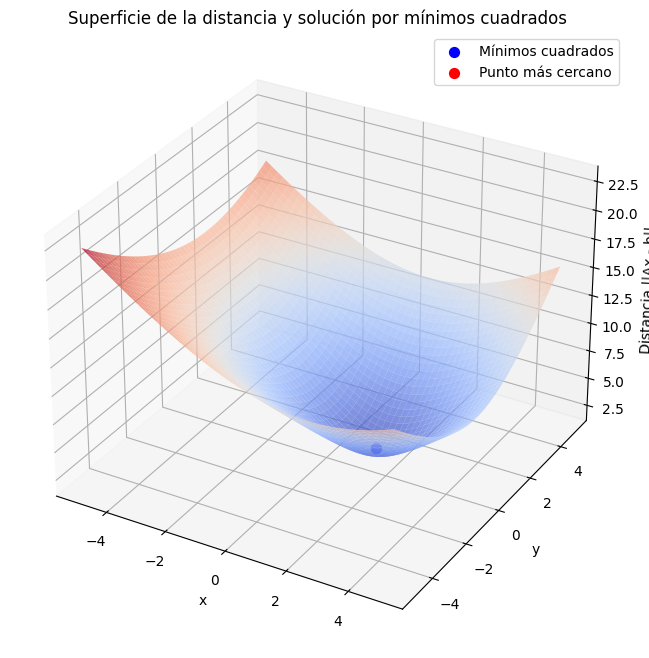

Solución por mínimos cuadrados: (1.43, 0.43)
Punto con la menor distancia: (1.43, 0.43)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, -1], [1, 2], [1, 1]])
b = np.array([2, 1, 4])
solu = np.dot(A.T, A)
inv = np.linalg.inv(solu)
resultado = np.dot(np.dot(inv, A.T), b)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

x_vals = np.arange(-5, 5, 0.01)
y_vals = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x_vals, y_vals)

def funcion(x, y):
    z1 = 2 * x - y - 2
    z2 = x + 2 * y - 1
    z3 = x + y - 4
    return np.sqrt(z1**2 + z2**2 + z3**2)

Z = funcion(X, Y)

superficie = ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.7)

min_distancia = np.min(Z)
indice_lineal = np.argmin(Z)
indices = np.unravel_index(indice_lineal, Z.shape)
x_min, y_min = X[indices], Y[indices]

ax.scatter(resultado[0], resultado[1], funcion(resultado[0], resultado[1]), color='blue', s=50, label='Mínimos cuadrados')
ax.scatter(x_min, y_min, min_distancia, color='red', s=50, label='Punto más cercano')
ax.set_title('Superficie de la distancia y solución por mínimos cuadrados')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Distancia ||Ax - b||')
ax.legend()

plt.show()

print(f"Solución por mínimos cuadrados: ({resultado[0]:.2f}, {resultado[1]:.2f})")
print(f"Punto con la menor distancia: ({x_min:.2f}, {y_min:.2f})")

In [ ]:
#PUNTO 2

Mounted at /content/drive


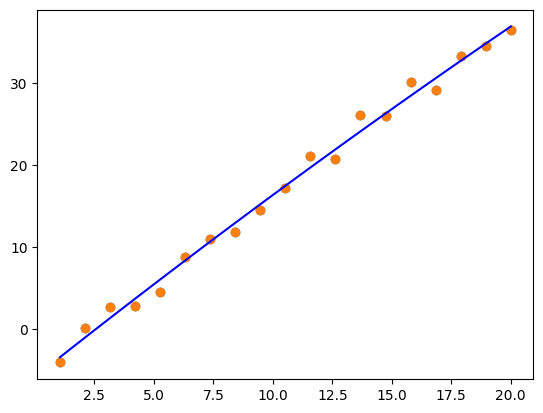

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

file = '/content/drive/MyDrive/MinimosLineal.txt'
data = pd.read_csv(file,sep=" ")
data.columns = ["x","y"]
x = np.array(data['x'])
y = np.array(data['y'])
plt.scatter(x,y)

def GetFit(x,y,n=2):

  lenght = x.shape[0]
  b = y

  A = np.ones((lenght,n+1))

  for i in range(1,n+1):
    A[:,i] = x**i

  AT = np.dot(A.T,A)
  bT = np.dot(A.T,b)

  xsolve = np.linalg.solve(AT,bT)

  return xsolve

n=2
xsol = GetFit(x,y,n=n)

def GetModel(x,p):

  y = 0.
  for n in range(len(p)):
    y += p[n]*x**n

  return y

_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,xsol)


import sympy as sym
X = sym.Symbol('x')
GetModel(X,xsol)

plt.scatter(x,y)
plt.plot(_x,_y,color='b')

In [ ]:
#PUNTO 3

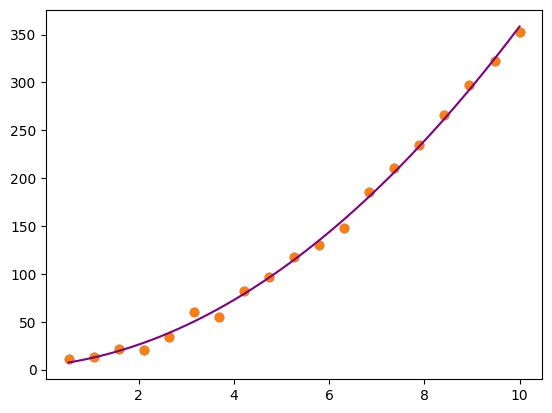

In [35]:
archivo = '/content/drive/MyDrive/MinimosCuadratico.txt'
datos = pd.read_csv(archivo,sep=" ")
datos.columns = ["x","y"]
x1 = np.array(datos['x'])
y1 = np.array(datos['y'])
plt.scatter(x1,y1)

def getfit(x1,y1,n=2):

  lenght1 = x1.shape[0]
  b1 = y1

  M = np.ones((lenght1,n+1))

  for i in range(1,n+1):
    M[:,i] = x1**i

  MT = np.dot(M.T,M)
  b1T = np.dot(M.T,b1)

  xsolve = np.linalg.solve(MT,b1T)

  return xsolve

n=2
xsol1 = getfit(x1,y1,n=n)

def getmodel(x,p1):

  y1 = 0.
  for n in range(len(p1)):
    y1 += p1[n]*x**n

  return y1

_x1 = np.linspace(np.min(x1),np.max(x1),50)
_y1 = getmodel(_x1,xsol1)


import sympy as sym
X1 = sym.Symbol('x')
getmodel(X1,xsol1)

plt.scatter(x1,y1)
plt.plot(_x1,_y1,color='purple')